In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x=np.array([75,89,81,75,67])
y=np.array([89,99,74,63,70])

In [5]:
model=np.polyfit(x,y,1)

In [6]:
model

array([  1.20508982, -14.2739521 ])

In [8]:
predict = np.poly1d(model)
predict(75)

76.10778443113772

In [9]:
y_pred=predict(x)
y_pred

array([76.10778443, 92.97904192, 83.33832335, 76.10778443, 66.46706587])

In [11]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.4501611625936063

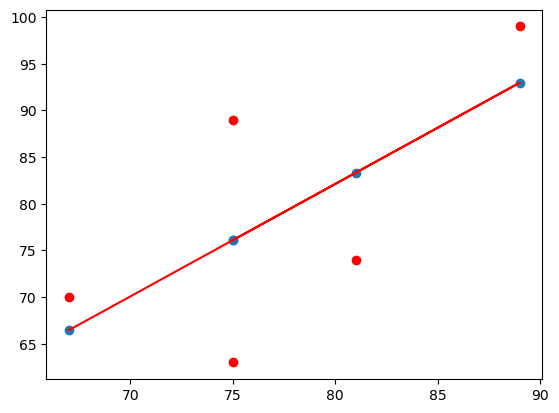

In [12]:
y_line = model[1] + model[0]*x
plt.plot(x,y_line,c='r')
plt.scatter(x,y_pred)
plt.scatter(x,y,c='r')

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LinearRegression

In [14]:
boston=fetch_openml(data_id=531,parser='auto')
data=pd.DataFrame(boston.data)
data.columns=boston.feature_names
data['PRICE']=boston.target

In [15]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
x=pd.DataFrame(imputer.fit_transform(data.drop(['PRICE'],axis=1)),
columns=data.drop(['PRICE'],axis=1).columns)
y=data['PRICE']
data=data.dropna()
x=x.loc[data.index]

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)

In [18]:
ytrain_pred=lm.predict(xtrain)
ytest_pred=lm.predict(xtest)
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,ytest_pred)
print(mse)
mse=mean_squared_error(ytrain_pred,ytrain)
print(mse)

33.44897999767632
19.326470203585725


In [20]:
mse=mean_squared_error(ytest,ytest_pred)
print(mse)

33.44897999767632


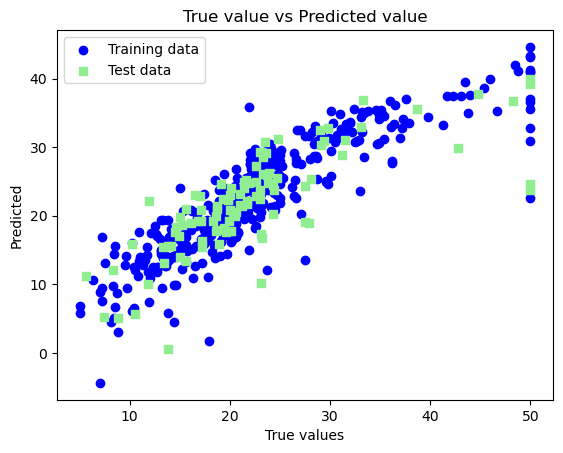

In [23]:
plt.scatter(ytrain,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc='upper left')
#plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()